     tiempo_s  p1_bar   pm1_bar   pm2_bar   pm3_bar   pm4_bar  p2_bar  \
225     450.0     3.2  3.172965  2.465980  1.761055  1.056131     1.0   
300     600.0     4.2  4.001615  3.161628  2.336758  1.511888     1.1   
500    1000.0     4.2  4.077770  3.296895  2.525334  1.753774     1.5   

     velc_m/s    F_m3/s    F_m3/h  
225  0.676607  0.000343  1.234231  
300  1.832847  0.000929  3.343382  
500  1.438666  0.000729  2.624337  


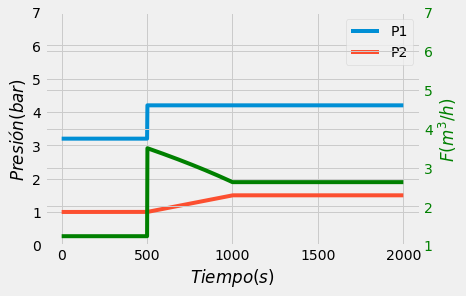

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np
import pandas as pd
from scipy.optimize import newton
#from IPython.display impor display
from SPQentrada import *

#Datos iniciales
p1 = 3.2
p2 = 1
d_in = 1 
L1 = 10
ht = 21
L2 = 20
dt = 2
fd = 0.03
rho = 1000  #kg/m3
g = 9.8

K = 0.9 #codo 90º

h_mano1 = 0
h_mano2 = 7 
h_mano3 = 14
h_mano4 = 21

#Datos Escalon P1
t0_e1= 500
A_e1 = 1

#Datos Escalon P2
t0_e2= 500
A_e2 = 0

#Datos Rampa P1
t0_r1 = 500
pend1 = 0
dt1 = 500

#Datos Rampa P2
t0_r2 = 500
pend2 = 0.001
dt2 = 500

#Datos ExpDecreciente P1
t0_exd1 = 500
tau1 = 100
A_exd1 = 0

#Datos ExpDecreciente P2
t0_exd2 = 500
tau2 = 100
A_exd2 = 0

#límites "y". Cambio de escala
escalapresion = (0,7)
escalaF = (1,7)



def ejercicio14():
    
    #conversión automática de datos
    d_m = d_in * 0.0254
    area = np.pi * d_m**2 / 4
    
    T = []
    P1 = []
    P2 = []
    P_MANO1 = []
    P_MANO2 = []
    P_MANO3 = []
    P_MANO4 = []
    V = []
    F = []

    for i in range(0,1001,1):
        t = i * dt
        T = np.append(T, t)
        p1t = p1 \
        + ESCALON(t0_e1, A_e1, t)\
        + RAMPA(t0_r1, pend1, dt1, t)\
        + ExpDecr(t0_exd1, tau1, A_exd1, t)
        P1 = np.append(P1, p1t)
    
        p2t = p2 \
        + ESCALON(t0_e2, A_e2, t)\
        + RAMPA(t0_r2, pend2, dt2, t)\
        + ExpDecr(t0_exd2, tau2, A_exd2, t)
        P2 = np.append(P2, p2t)
    
        p1_pascal = p1t * 100000
        p2_pascal = p2t * 100000
        
        #En lugar de despejar v, resuelvo para F0=0
        def FOsolv (v):
            
            F0 = (p1_pascal - p2_pascal) / (rho * g) \
            - fd * (L1+ht+L2)/d_m * v ** 2  / (2 * g) \
            - 2 * (K * (v**2) / (2 * g))\
            - 21
            return F0
        
        sol = newton(FOsolv, 1.5)
        v = sol
    
        V = np.append(V, v)
        
        
        # 1º Manómetro
        p_mano_pasca1 = rho * (p1_pascal/rho \
                               - fd * ((L1+h_mano1)/ d_m) * (v**2 /2))
                               
        p_mano1 = p_mano_pasca1 / 100000
        P_MANO1 = np.append(P_MANO1, p_mano1)
        
        # 2º Manómetro
        p_mano_pasca2 = rho * g * (p1_pascal/(rho*g) \
                               - fd * ((L1+h_mano2) / d_m) * (v**2 / (2*g)) \
                               - K * (v**2 / (2*g))\
                               - h_mano2)
        
        p_mano2 = p_mano_pasca2 / 100000
        P_MANO2 = np.append(P_MANO2, p_mano2)
                               
        # 3º Manómetro
        p_mano_pasca3 = rho * g * (p1_pascal/(rho*g) \
                               - fd * ((L1+h_mano3) / d_m) * (v**2 / (2*g)) \
                               - K * (v**2 / (2*g))\
                               - h_mano3)
        
        p_mano3 = p_mano_pasca3 / 100000
        P_MANO3 = np.append(P_MANO3, p_mano3)
                               
        # 4º Manómetro
        p_mano_pasca4 = rho * g * (p1_pascal/(rho*g) \
                               - fd * ((L1+h_mano4) / d_m) * (v**2 / (2*g)) \
                               - K * (v**2 / (2*g))\
                               - h_mano4)
        
        p_mano4 = p_mano_pasca4 / 100000
        P_MANO4 = np.append(P_MANO4, p_mano4)
    
        f = v * area
        F = np. append(F, f)

    F_m3h= F * 3600

    #creacion de tabla df para pandas:
    valores = {'tiempo_s':T,
               'p1_bar':P1,
               'pm1_bar':P_MANO1,
               'pm2_bar':P_MANO2,
               'pm3_bar':P_MANO3,
               'pm4_bar':P_MANO4,
               'p2_bar':P2,
               'velc_m/s':V,
               'F_m3/s':F, 'F_m3/h':F_m3h}
    columnas = ['tiempo_s','p1_bar',
                'pm1_bar','pm2_bar',
                'pm3_bar','pm4_bar',
                'p2_bar', 'velc_m/s', 'F_m3/s', 'F_m3/h']
    df = pd.DataFrame(valores, columns=columnas)

    #gráficos
    fig, ax1 = plt.subplots()

    ax1.plot(T, P1, label="P1")
    ax1.plot(T, P2, label="P2")
    ax1.set_xlabel('$Tiempo (s)$')
    ax1.set_ylabel('$Presión (bar)$')

    ax2 = ax1.twinx()
    ax2.plot(T, F_m3h, 'g-')
    ax2.set_ylabel('$F (m^3/h)$', color='g')
    ax2.tick_params('y', colors='g')

    #limites en y (Corrección de escala)
    ax1.set_ylim(escalapresion)
    ax2.set_ylim(escalaF)
    ax1.legend()

    tabla = df[(df.tiempo_s == 450) | (df.tiempo_s == 600) | (df.tiempo_s == 1000)]
    print (tabla)
    
ejercicio14()

Buscar un valor específico

     tiempo_s  p1_bar   pm1_bar  pm2_bar   pm3_bar   pm4_bar  p2_bar  \
225     450.0     3.2  3.172965  2.46598  1.761055  1.056131     1.0   
300     600.0     4.2  4.172965  3.46598  2.761055  2.056131     2.0   
500    1000.0     8.2  8.172965  7.46598  6.761055  6.056131     6.0   

     velc_m/s    F_m3/s    F_m3/h  
225  0.676607  0.000343  1.234231  
300  0.676607  0.000343  1.234231  
500  0.676607  0.000343  1.234231  


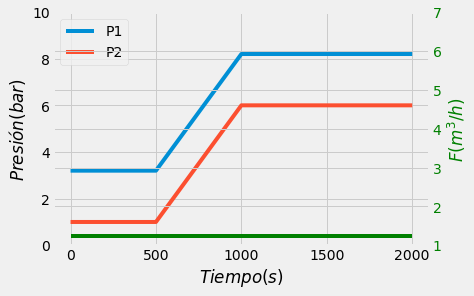

In [11]:
#Datos iniciales
p1 = 3.2
p2 = 1
d_in = 1 
L = 51
dt = 2
fd = 0.03
rho = 1000  #kg/m3

K = 0.9 #codo 90º

h_mano1 = 0
h_mano2 = 7 
h_mano3 = 14
h_mano4 = 21

#Datos Escalon P1
t0_e1= 500
A_e1 = 0

#Datos Escalon P2
t0_e2= 500
A_e2 = 0

#Datos Rampa P1
t0_r1 = 500
pend1 = 5/500
dt1 = 500

#Datos Rampa P2
t0_r2 = 500
pend2 = 5/500
dt2 = 500

#Datos ExpDecreciente P1
t0_exd1 = 500
tau1 = 100
A_exd1 = 0

#Datos ExpDecreciente P2
t0_exd2 = 500
tau2 = 100
A_exd2 = 0

#límites "y". Cambio de escala
escalapresion = (0,10)
escalaF = (1,7)

ejercicio14()

     tiempo_s  p1_bar   pm1_bar   pm2_bar   pm3_bar   pm4_bar  p2_bar  \
225     450.0     3.2  3.172965  2.465980  1.761055  1.056131     1.0   
300     600.0     4.2  4.020653  3.195445  2.383902  1.572359     1.2   
500    1000.0     8.2  7.411408  6.113303  4.875289  3.637274     2.0   

     velc_m/s    F_m3/s    F_m3/h  
225  0.676607  0.000343  1.234231  
300  1.742681  0.000883  3.178905  
500  3.654243  0.001852  6.665875  


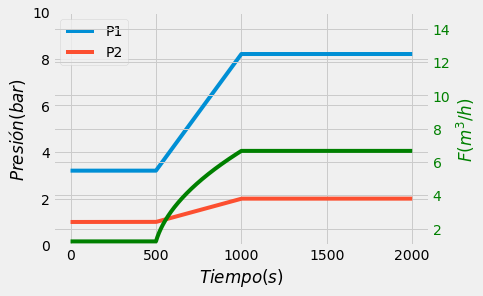

In [13]:
#Datos iniciales
p1 = 3.2
p2 = 1
d_in = 1 
L = 51
dt = 2
fd = 0.03
rho = 1000  #kg/m3

K = 0.9 #codo 90º

h_mano1 = 0
h_mano2 = 7 
h_mano3 = 14
h_mano4 = 21

#Datos Escalon P1
t0_e1= 500
A_e1 = 0

#Datos Escalon P2
t0_e2= 500
A_e2 = 0

#Datos Rampa P1
t0_r1 = 500
pend1 = 5/500
dt1 = 500

#Datos Rampa P2
t0_r2 = 500
pend2 = 1/500
dt2 = 500

#Datos ExpDecreciente P1
t0_exd1 = 500
tau1 = 100
A_exd1 = 0

#Datos ExpDecreciente P2
t0_exd2 = 500
tau2 = 100
A_exd2 = 0

#límites "y". Cambio de escala
escalapresion = (0,10)
escalaF = (1,15)

ejercicio14()

     tiempo_s  p1_bar   pm1_bar   pm2_bar   pm3_bar   pm4_bar    p2_bar  \
225     450.0     3.2  3.172965  2.465980  1.761055  1.056131  1.000000   
300     600.0     3.2  3.185000  2.487356  1.790856  1.094356  1.063212   
500    1000.0     3.2  3.191875  2.499569  1.807882  1.116195  1.099326   

     velc_m/s    F_m3/s    F_m3/h  
225  0.676607  0.000343  1.234231  
300  0.503990  0.000255  0.919352  
500  0.370914  0.000188  0.676601  


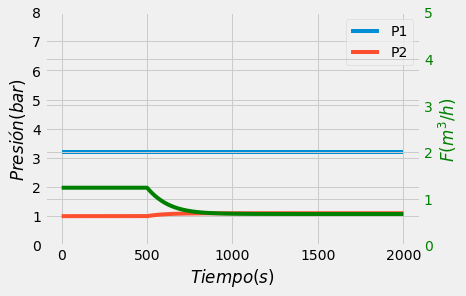

In [19]:
""" la exponencial A_exp2=1 no converge, se modifica a A_exp2= 0.1"""

#Datos iniciales
p1 = 3.2
p2 = 1
d_in = 1 
L = 51
dt = 2
fd = 0.03
rho = 1000  #kg/m3

K = 0.9 #codo 90º

h_mano1 = 0
h_mano2 = 7 
h_mano3 = 14
h_mano4 = 21

#Datos Escalon P1
t0_e1= 500
A_e1 = 0

#Datos Escalon P2
t0_e2= 500
A_e2 = 0

#Datos Rampa P1
t0_r1 = 500
pend1 = 0
dt1 = 500

#Datos Rampa P2
t0_r2 = 500
pend2 = 0
dt2 = 500

#Datos ExpDecreciente P1
t0_exd1 = 500
tau1 = 100
A_exd1 = 0

#Datos ExpDecreciente P2
t0_exd2 = 500
tau2 = 100
A_exd2 = 0.1

#límites "y". Cambio de escala
escalapresion = (0,8)
escalaF = (0,5)

ejercicio14()

     tiempo_s  p1_bar   pm1_bar   pm2_bar   pm3_bar   pm4_bar  p2_bar  \
225     450.0     3.2  3.172965  2.465980  1.761055  1.056131     1.0   
300     600.0     4.2  3.982576  3.127811  2.289614  1.451417     1.0   
500    1000.0     8.2  7.792186  6.789642  5.818172  4.846703     4.0   

     velc_m/s    F_m3/s    F_m3/h  
225  0.676607  0.000343  1.234231  
300  1.918781  0.000972  3.500138  
500  2.627859  0.001332  4.793601  


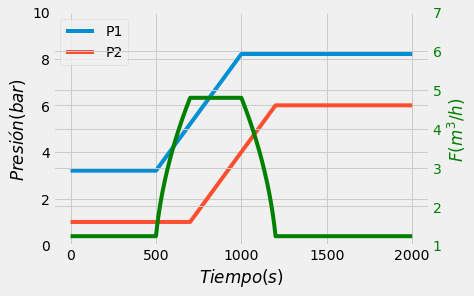

In [21]:
#Datos iniciales
p1 = 3.2
p2 = 1
d_in = 1 
L = 51
dt = 2
fd = 0.03
rho = 1000  #kg/m3

K = 0.9 #codo 90º

h_mano1 = 0
h_mano2 = 7 
h_mano3 = 14
h_mano4 = 21

#Datos Escalon P1
t0_e1= 500
A_e1 = 0

#Datos Escalon P2
t0_e2= 500
A_e2 = 0

#Datos Rampa P1
t0_r1 = 500
pend1 = 5/500
dt1 = 500

#Datos Rampa P2
t0_r2 = 700
pend2 = 5/500
dt2 = 500

#Datos ExpDecreciente P1
t0_exd1 = 500
tau1 = 100
A_exd1 = 0

#Datos ExpDecreciente P2
t0_exd2 = 500
tau2 = 100
A_exd2 = 0

#límites "y". Cambio de escala
escalapresion = (0,10)
escalaF = (1,7)

ejercicio14()

     tiempo_s  p1_bar   pm1_bar   pm2_bar   pm3_bar   pm4_bar  p2_bar  \
225     450.0     3.2  3.172965  2.465980  1.761055  1.056131     1.0   
300     600.0     4.2  4.001615  3.161628  2.336758  1.511888     1.1   
500    1000.0     3.8  3.753926  3.032163  2.313911  1.595659     1.5   

     velc_m/s    F_m3/s    F_m3/h  
225  0.676607  0.000343  1.234231  
300  1.832847  0.000929  3.343382  
500  0.883283  0.000448  1.611239  


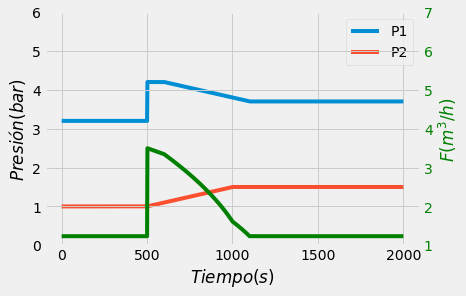

In [23]:
#Datos iniciales
p1 = 3.2
p2 = 1
d_in = 1 
L = 51
dt = 2
fd = 0.03
rho = 1000  #kg/m3

K = 0.9 #codo 90º

h_mano1 = 0
h_mano2 = 7 
h_mano3 = 14
h_mano4 = 21

#Datos Escalon P1
t0_e1= 500
A_e1 = 1

#Datos Escalon P2
t0_e2= 500
A_e2 = 0

#Datos Rampa P1
t0_r1 = 600
pend1 = -0.001
dt1 = 500

#Datos Rampa P2
t0_r2 = 500
pend2 = 0.001
dt2 = 500

#Datos ExpDecreciente P1
t0_exd1 = 500
tau1 = 100
A_exd1 = 0

#Datos ExpDecreciente P2
t0_exd2 = 500
tau2 = 100
A_exd2 = 0

#límites "y". Cambio de escala
escalapresion = (0,6)
escalaF = (1,7)

ejercicio14()